---
title: More Mandalas, high school math and Python
categories:
    - python
    - mathematics
image: triangle-mandala.jpeg
date: 2024-12-28
Execute:
    freeze: auto
code-fold: true
---

We will now look at how to draw traingles around the circle, so that we can create proper looking mandalas. Refer to the [previous post](https://gvgk.in/blog/geometric-art-python/) for the backstory. 

# Triangles

Triangles have three sides and three vertices. We can use the polygon feature of python, if we are able to calculate where the three vertices are. 

In the previous post, we have already seen how to identify $n$ equally spaced points around the circle. Now, any two adjacent points can be the two vertices of the triangle. The third vertex needs to be below these two, since we do not want the circles to grow out. The key idea here is that the third vertex is on another circle which has a slightly lesser radius than this one. 

What would be the difference in the two radii? That would be the height of the triangle. While we can choose any height, let us start with an equilateral triangle. In this case, basic trigonometry tells you the height. Refer to the picture below. I have made it deliberately exagerated with smaller radii and a larger side of the triangle. 

![](triangle.jpg)

We notice that for an equilateral triangle the difference in radii is $\sqrt3*s/2$. Also, the line connecting the third vertex to the center is midway between the two points of the base. 

## The math

Consider a circle of radius $r$. Divide the angle around the circle into $n$ parts. 

Consider the first angle $\theta$. Find the $x$ and $y$ coordinates of the point on the circle by calculating $rsin(\theta)$ and $rcos(\theta)$. Now find the next angle 2$\theta$. Find the $x$ and $y$ coordinates of the point on the circle by calculating $rsin(2\theta)$ and $rcos(2\theta)$. 

```
theta = i*2*np.pi/n # calculate the angle of the first of n points 
theta1 = (i+1)*2*np.pi/n # calculate the angle of the next point
x1 = r*np.cos(theta) # x coordinate of first point
y1 = r*np.sin(theta) # y coordinate of first point
x2 = r*np.cos(theta1) # x coordinate of second point
y2 = r*np.sin(theta1) # y coordinate of second point 

```

Find the distance between these two using distance between two points formula. Take $\sqrt3/2$ times this distance and subtract from $r$. This is r1, the radius of the smaller circle, on which we will find the third vertext. 

$r1 = r - np.sqrt(3)*np.sqrt((x2-x1)**2+(y2-y1)**2)/2$

The angle subtended by the third vertex at the center is half of $\theta$ and 2$\theta$. Using these, the third vertex coordinates are 
```
x3 = r1*np.cos((theta+theta1)/2)
y3 = r1*np.sin((theta+theta1)/2)

```
Now the rest of the code looks like this. 

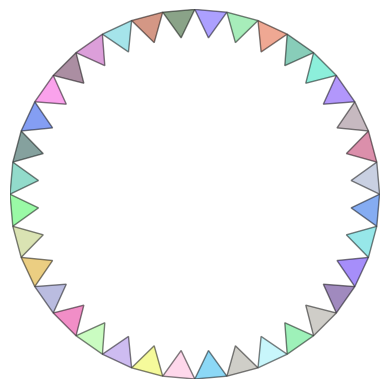

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import random

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()
n = 36 # number of traingles
r = 10 # radius of the outer circle

for i in range(n):
    theta = i*2*np.pi/n # calculate the angle of the first of n points 
    theta1 = (i+1)*2*np.pi/n # calculate the angle of the next point
    x1 = r*np.cos(theta) # x coordinate of first point
    y1 = r*np.sin(theta) # y coordinate of first point
    x2 = r*np.cos(theta1) # x coordinate of second point
    y2 = r*np.sin(theta1) # y coordinate of second point 
    r1 = r - np.sqrt(3)*np.sqrt((x2-x1)**2+(y2-y1)**2)/2 # calculate the radius of the smaller circle
    x3 = r1*np.cos((theta+theta1)/2) # x coordinate of the third vertex
    y3 = r1*np.sin((theta+theta1)/2) # y coordinate of the third vertex
    vertices = np.array([[x1, y1], [x2, y2], [x3, y3]]) # all the vertices are grouped
    polygon = Polygon (vertices, facecolor=random_hex_color(), edgecolor='black', alpha=.5) # draws the polygon
    axes.add_patch(polygon)

    
# Set the figure area square
axes.set_aspect(1)

# Set axes limits
axes.set_xlim(-r, r)
axes.set_ylim(-r, r)

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()


# Multiple layers

Now, we need to generate multiple layers. Each time, we can calculate the height of the triangle, identify the third vertex and go around. Then, the next circle radius will be current radius - the height of the triangle. 

To implement this logic, we separate out the calculation of radius and the height into a separate function. Notice that this function returns two values in a list, and we use the values by specifiying the index of the list using [0] and [1].

The code looks like this. The comments in the code explain what is happening. 


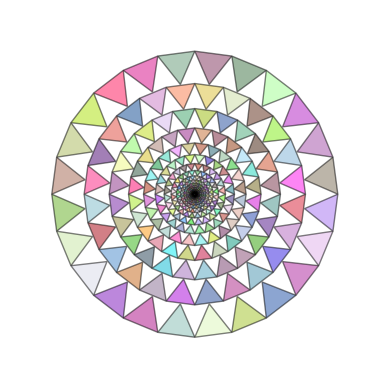

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import random

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()
n = 24 # number of traingles
r = 10 # radius of the outer circle
l = 20 # number of layers
current_r = r

def radius_smaller_circle (r,n): # separating out the radius and height calculations
        theta = 2*np.pi/n # calculate the angle of the first point 
        theta1 = 2*2*np.pi/n # calculate the angle of the second
        x1 = r*np.cos(theta) # x coordinate of first point
        y1 = r*np.sin(theta) # y coordinate of first point
        x2 = r*np.cos(theta1) # x coordinate of second point
        y2 = r*np.sin(theta1) # y coordinate of second point 
        h = np.sqrt(3)*np.sqrt((x2-x1)**2+(y2-y1)**2)/2 # height of the triangle
        r1 = r - h # calculate the radius of the smaller circle
        return [h,r1] # returns two values in a list

def draw_triangles_around_circle(r,n):
    for i in range(n):
        theta = i*2*np.pi/n # calculate the angle of the first of n points 
        theta1 = (i+1)*2*np.pi/n # calculate the angle of the next point
        x1 = r*np.cos(theta) # x coordinate of first point
        y1 = r*np.sin(theta) # y coordinate of first point
        x2 = r*np.cos(theta1) # x coordinate of second point
        y2 = r*np.sin(theta1) # y coordinate of second point 
        r1 = radius_smaller_circle (r,n)[1] # second of the two returned values
        x3 = r1*np.cos((theta+theta1)/2) # x coordinate of the third vertex
        y3 = r1*np.sin((theta+theta1)/2) # y coordinate of the third vertex
        vertices = np.array([[x1, y1], [x2, y2], [x3, y3]]) # all the vertices are grouped
        polygon = Polygon (vertices, facecolor=random_hex_color(), edgecolor='black',alpha=.5) # draws the polygon
        axes.add_patch(polygon)

for i in range(l): # for the number of layers, for each layer, calculate the radius of the smaller circle.
     current_r -= radius_smaller_circle(current_r,n)[0] # use the first returned value, height
     draw_triangles_around_circle(current_r,n) # draw the triangles
    
# Set the figure area square
axes.set_aspect(1)

# Set axes limits
axes.set_xlim(-r, r)
axes.set_ylim(-r, r)

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()


# The final touch, again

Once again, it would be nice if the traingles do not line up but are staggered. So, we need to shift alternate layers by half the angle difference. We do this by introducing a condition and shifting. 

The code and output below. 

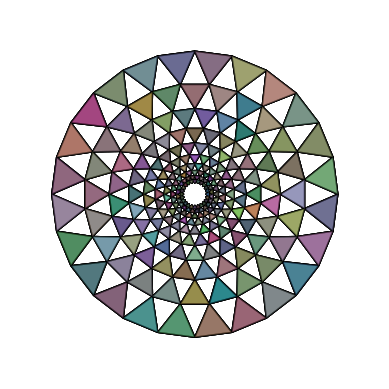

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import random

def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

figure, axes = plt.subplots()
n = 24 # number of traingles
r = 10 # radius of the outer circle
l = 10 # number of layers
current_r = r

def radius_smaller_circle (r,n):
        theta = 2*np.pi/n # calculate the angle of the first of n points 
        theta1 = 2*2*np.pi/n # calculate the angle of the next point
        x1 = r*np.cos(theta) # x coordinate of first point
        y1 = r*np.sin(theta) # y coordinate of first point
        x2 = r*np.cos(theta1) # x coordinate of second point
        y2 = r*np.sin(theta1) # y coordinate of second point 
        h = np.sqrt(3)*np.sqrt((x2-x1)**2+(y2-y1)**2)/2
        r1 = r - h # calculate the radius of the smaller circle
        return [h,r1]

def draw_triangles_around_circle(r,n, shift_theta=False):
    for i in range(n):
        theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
        if shift_theta:
             theta += (np.pi / n)  # Shift by 0.5 theta
        for t in theta:
            theta1 = t + 2*np.pi/n
            x1 = r*np.cos(t) # x coordinate of first point
            y1 = r*np.sin(t) # y coordinate of first point
            x2 = r*np.cos(theta1) # x coordinate of second point
            y2 = r*np.sin(theta1) # y coordinate of second point 
            r1 = radius_smaller_circle (r,n)[1]
            x3 = r1*np.cos((t+theta1)/2) # x coordinate of the third vertex
            y3 = r1*np.sin((t+theta1)/2) # y coordinate of the third vertex
            vertices = np.array([[x1, y1], [x2, y2], [x3, y3]]) # all the vertices are grouped
            polygon = Polygon (vertices, facecolor = random_hex_color(), edgecolor='black',alpha= 0.2) # draws the polygon
            axes.add_patch(polygon)

for i in range(l):
     shift_theta = (i % 2 == 1) # true for odd i, false for even i
     current_r -= radius_smaller_circle(current_r,n)[0]
     draw_triangles_around_circle(current_r,n,shift_theta)
    
# Set the figure area square
axes.set_aspect(1)

# Set axes limits
axes.set_xlim(-r, r)
axes.set_ylim(-r, r)

# Hide axes labels
axes.set_xticks([])
axes.set_yticks([])

# Remove the border
for spine in axes.spines.values():
    spine.set_visible(False)

plt.show()


See how circles and curve appear on this picture, even though all we have drawn is traingles. Also, see how close this is to the colored mandala made with 24 circles.

![](../geometric-art-python//mandala.jpg)

There are significant differences too. The height of the triangles decreases outwards in one and inwards in the other. The mandala has circles in the center and then has triangles. 

Now that we know how to create circles and triangles on circles of various diameters, maybe next we can try to combine them and create a proper mandala! 